<a href="https://colab.research.google.com/github/Rogerio-mack/Deep-Learning-I/blob/main/T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 

<h1 align=left><font size = 8, style="color:rgb(200,0,0)"><b>Inteligência Artificial</b></font></h1> 
<h1 align=left><font size = 6, style="color:rgb(0,0,0)"><b>Deep Learning</b></font></h1> 

# 1 Introdução aos Modelos Neurais
Professor(a): Rogério de Oliveira

<br>
<br>

---


# Apresentação da Componente Curricular

São inúmeras as aplicações que vemos associadas aos modelos de Redes Neurais Profundas (ou Deep Learning). Veículos autônomos, deepfake, tradução de linguagem natural, geração automática de textos e legendas, reconhecimento de imagens, modelos de atenção, detecção de anomalias, programação automática... para citar alguns que vem facilmente à mente se acompanhamos um pouco a evolução das tecnologias junto a mídia. Esses modelos vem viabilizando a solução de problemas que antes julgávamos intratáveis e podemos certamente dizer que estão fazendo trazendo uma profunda transformação na ciência e nos negócios levando a IA a inúmeros campos de aplicação.

Nesta componente você irá aprender sobre esses modelos de neurais de aprendizado de máquina. Vamos começar aqui pelos modelos mais básicos e entender os principais conceitos de Redes Neurais Artificiais e de Redes Neurais Profundas. Vamos  conhecer suas principais de arquiteturas, e em particular estudar as arquiteturas Feed-Forward, ou modelos Sequenciais, e as arquiteturas de Autoencoder. Outros modelos de redes, como modelos Convolucionais e Recorrentes são tratados mais adiante em outra componente.

Aqui vamos nos concentrar em como é feito o aprendizado desses modelos, e aprender e praticar técnicas importantes como gradiente descendente, gradiente estocático, backpropagation, regularização e drop out, e desenvolver aplicações. 

Para que você possa desenvolver seus próprios modelos vamos estudar os principais frameworks de desenvolvimento de modelos neurais, começando pelo `sci-kit learn` para modelos neurais tradicionais e em seguida os frameworks `Keras/TensorFlow` e `PyTorch` para redes profundas. Para cada um vamos desenvolver juntos soluções de aprendizado supervisionado e não supervisionado, resolvendo problemas de classificação, regressão etc. e empregar soluções de nuvem com acesso a recursos de GPU.

Vamos lá? ;-)

## Programa 

Para que tenha uma ideia geral dos conteúdos desta componente, segue abaixo os pontos que serão vistos em cada trilha.

1. Introdução aos Modelos Neurais
2. MLP Modelo Multilayer Perceptron
3. Tensores, GPU, AutoGrad e Grafos de Execução
4. Modelos Sequenciais e Classificação com TensorFlow
5. Regressão e Regularização de Modelos
6. Modelos Sequencias com PyTorch
7. Modelos Autoencoder
8. Aplicações e outros modelos de Deep Learning

# Introdução

Nesta trilha vamos apresentar os principais conceitos dos modelos neurais começando pela definição de um neurônio artificial, o modelo perceptron e seu aprendizado e vamos entender como esses elementos simples podem ser combinados para construírmos poderosas *redes neurais*.

Antes de entrarmos na estrutura desse modelo, vale a pena você conhecer um pouco da evolução desses modelos. Os modelos neurais não são novos, mas sua evolução passa por altos e baixos e é importante que você compreenda como chegamos aqui e no entusiasmo que cerca as redes profundas hoje.

Você vai conhecer o modelo de artificial de neurônio chamado **perceptron**. Criado nos anos 40 esse ainda é o modelo empregado pela maior parte das redes neurais, incluindo as redes *deep learning* em `TensorFlow`, `PyTorch` etc. 
E irá entender o que são as **funções de ativação** e como se dá o **aprendizado do perceptron**.

Esses modelos simples de neurônios podem então ser combinados para formarem redes de perceptrons que podem, então, resolverem problemas dos mais complexos.

Essas redes, redes neurais multicamada, **feed-forward** ou **MLP Multilayer Perceptron** exigem técnicas mais elaboradas de aprendizado que o neurônio simples e você vai poder conhecer e explorar aqui um pouco da técnica da **retropagação do erro**, ou **backpropagation**. E para compreender melhor como se dá o aprendizado das redes você vai ainda estudar em detalhe a técnica de **descida do gradiente** em casos simples de rede em uma única camada. 

Todos esses conceitos são fundamentais para o entendimento dos modelos neurais e vão nos acompanhar vao longo do estudo de toda nossa componente.



# Evolução dos Modelos Neurais

Redes neurais artificiais não são um conceito novo. Inspirados no modelo de um neurônio biológico, Walter Pitts e Warren McCulloch mostraram em 1943 que unidades lógicas com thresholds, thresholded logic unit (que produzem disparo, são ativados ou enviam um sinal), poderiam ser combinadas para para produzir uma máquina de Turing usando portas lógicas de AND, OR e NOT. 

Esse modelo, entretanto, ainda não mostrava a possibilidade de aprendizado. Foi só em 1949, que o psicólogo Donald Hebb descreveu alguns dos princípios aprendizado neural, mostrando como o aprendizado poderia ocorrer reforçando as conexões neurais. Esse princípio abriu então as portas para o aprendizado dos neurônios artificiais. 


## Modelo de Neurônio Artificial

Sobre o trabalho de McCulloch-Pitts, o psicólogo Frank Rosenblatt concebeu em 1957 o Perceptron, um modelo matemático bastante simplificado de um neurônio biológico. Esse modelo é basicamente o mesmo empregado até hoje nos modelos neurais e mesmo redes neurais profundas.

<figure>
<br>
<img src="http://meusite.mackenzie.br/rogerio/Deep_Learning/DL_01_perceptron.png" width=500, align="center">
<br>
<br>
<figcaption><b>Modelo Perceptron de Neurônio Artificial.</b></figcaption>
</figure>

No modelo de Rosenblatt as entradas, que podem vir de outros neurônio ou sensores, são ponderadas pelos pesos como uma combinação linear. Note que há um termo independente que faz o papel do termo independente na expressão linear. Essa somatória é, no modelo de Rosenblatt, submetida a uma função threshold, ou função limiar, que faz o papel de disparo do neurônico biológico.

Esse modelo, em uma época em que se pensava que seria suficiente computar operadores lógicos que para se produzir inteligência artificial foi um marco.

O modelo, entretanto, ainda não tinha um mecanismo de aprendizado, o que era crucial para um modelo de Inteligência Artificial. Rosenblatt encontrou, na teoria do aprendizado Hebbiano, o que princípio que faltava para criar um mecanismo de aprendizado para os neurônios artificiais.


## Aprendizado do Neurônio Artificial

No Perceptron, os pesos nas entradas do neurônio permitiram um esquema de aprendizagem bastante simples e intuitivo: dado um conjunto de treinamento de exemplos de entrada-saída (uma função), o Perceptron deveria aprender a função a partir do ajuste dos pesos das entradas. Para cada elemento do conjunto de treinamento, o Perceptron aumentaria os pesos se a saída do Perceptron para a entrada fosse muito baixa em comparação à saída desse elemento, e diminuiria os pesos se a saída fosse muito alta. Mais formalmente o algoritmo seria:

```
1.	Comece com um Perceptron com pesos arbitrários e um conjunto de treinamento
2.	Para cada entrada do conjunto de treinamento, calcule a saída do Perceptron
3.	Se a saída do Perceptron é diferente da saída conhecida, então: 
4.	Se a saída é maior, diminua os pesos
5.	Se a saída é menor, aumente os pesos 
6.	Vá para o próximo elemento e repita 2-4 até o Perceptron não cometer mais erros 

```

Essa é uma ideia bastante simples. mas bastante influente de como se dá o aprendizado e, até hoje, o aprendizado se dá basicamente desse modo, mesmo nas redes profundas mais complexas. 

## Os Anos Perdidos: XOR 

Marvin Minsky e Seymour Papert (MIT Labs) já eram conhecidos e influentes cientistas quando publicaram em 1969 um trabalho criticando duramente a abordagem dos Perceptrons. Eles mostraram que um Perceptron com o seu mecanismo de aprendizado só poderia resolver problemas linearmente separáveis e que, por exemplo, não seriam capaz de aprender uma simples função booleana XOR por ser não linearmente separável. Esse trabalho, vindo de pesquisadores influentes, teve tanto impacto na comunidade científica provocando um retrocesso na pesquisa de modelos neurais, inibindo pesquisas e investimentos na área ao longo de mais de dez anos.  

<figure>
<br>
<img src="http://meusite.mackenzie.br/rogerio/Deep_Learning/DL_01_XOR2.png" width=500, align="center">
<br>
<br>
<figcaption><b>Funções AND, OR e XOR. Um único neurônio não pode mapear a função XOR, não linearmente separável.</b></figcaption>
</figure>

## O Retorno: Backpropagation 

A ideia de se conectar perceptrons, em que um neurônio receberia como entrada a saída de outro neurônio artificial, não era estranha aos pesquisadores e parecia mesmo natural se pensarmos no modelo biológico. Entretanto, a regra do aprendizado do perceptron não podia ser aplicada.

Foi somente no final da década de 80 que alguns pesquisadores Geoff Hinton, Rumelhart e Williams mostraram que os perceptrons organizados em camadas, formando redes neurais, poderiam ser treinados por um procedimento relativamente simples. Isso abria novamente as portas para os modelos neurais, já que a adição de camadas permitia agora o aprendizado de funções também não lineares. Mas tarde ainda, Kurt Hornik, demonstraria (Teorema da Aproximação Universal, 1991) que redes multicamada feed-forward são aproximadores universais. Daí para frente, se abria uma nova onda de pesquisas e investimentos em modelos neurais. 

>>> *Kurt Hornik, demonstraria (Teorema da Aproximação Universal, 1991) que redes multicamada feed-forward são aproximadores universais. Esse é um resultado poderoso pois, dada uma função qualquer (um conjunto de treinamento), o teorema dava a garantia de que existiria uma rede neural capaz de aproximar essa função.*

O algoritmo funciona tomando a derivada da função de erro da rede e retornando esse valor para atualizar os pesos dos neurônios nas camadas anteriores, de onde o nome backpropagation ou algoritmo de retropropagação. Você aprenderá mais sobre isso adiante. 



## SVM, novo eclipse

O cálculo de derivadas é computacionalmente bastante custoso e, nos anos 90, os recursos computacionais ainda eram bastante limitados comparado ao que você conhece hoje. Havia a certeza de que haveria uma rede de neurônios capaz de resolver o problema, mas em geral, estávamos bastante limitados pois não era viável construir redes com muitos elementos ou muitas camadas. 

Não obstante essas limitações o aprendizado de máquina, tanto de modelos neurais como de outros modelos mais tradicionais, já era uma realidade e competiam entre si. Baseado no aprendizado estatístico Vapnik (AT&T Bell Laboratories) e outros pesquisadores criam nos anos 90s um modelo conhecido como SVM (Support Vector Machines). As máquinas de vetores de suporte passam a suplantar muitos modelos de aprendizado em muitas tarefas, e são muito eficientes no treinamento, e passam a concentrar os investimentos e a pesquisa em IA diante da frustração de se treinar grandes modelos neurais.   

<figure>
<br>
<img src="http://meusite.mackenzie.br/rogerio/Deep_Learning/DL_01_history.png" width=900, align="center">
<br>
<br>
<figcaption><b>Timeline das Redes Neurais.</b></figcaption>
</figure>


## Deep Learning, Novo Retorno

Somente nos anos 2000, Geoff Hinton (Google, o mesmo que havia desenvolvido o backpropagation!), Yann Lecun (FaceBook), Yoshua Bengio e Jürgen Schmidhuber introduziram grandes avanços no aprendizado de redes neurais introduzindo o pré-aprendizado (Hinton), redes convolucionais (Lecun) e redes recorrentes possibilitando o que hoje conhecemos como Deep Learning, ou Redes Neurais Profundas.

Essas técnicas também se beneficiam hoje de maior capacidade computacional proporcionada pelo uso de computação em nuvem, avanços da tecnologia, uso de GPUs e vêm se popularizando e se industrializando a partir de soluções de software livre como o Keras/TensorFlow (Google), o PyTorch (FaceBook), o MXNet (Apache) e o CNTK (Microsoft) para desenvolvimento, e soluções em nuvem como a de grandes provedores como a Amazon AWS, Google Cloud e Azure.   


## Neurônio Artificial: Perceptron
 
Um neurônio artificial nada mais é do que um artefato de software que faz uma combinação linear das entradas e aplica uma **função de ativação** como a função $sign$, $tanh$ ou $relu$ para produzir uma saída.

$$ f(X) = sign( w_0 + w_1 x_1 + ... + w_n x_n ) $$

O treinamento do neurônio é feito ajustando-se os pesos $w_n$ de acordo com o erro de predição obtido para se estimar a saída $f(X) \cong y$.

$$ \min_{W} \sum || f(X)- y || $$

Você pode, então, entender o aprendizado de um neurônio como um **problema de otimização**.


# Funções de Ativação
Quaisquer combinações de operadores lineares são também lineares. Desse modo, sem uma função de ativação, as redes neurais somente poderiam solucionar problemas linearmente separáveis e seriam, portanto, equivalentes a um modelo de regressão linear. As funções de ativação são uma escolha importante na arquitetura de uma rede neural, pois facilitam a modelagem de relações mais complexas e são, ao final, elas que permitem que uma rede neural seja um aproximador universal de funções.

$$ f(x) = \frac{1}{(1 + e^{-x})} \quad \textrm{, Logistic } $$ 

$$ f(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}\quad \textrm{, Tanh} $$ 

$$ f(x) = max(0,x) \quad \textrm{, ReLu} $$ 

$$ f(x) = log(1 + e^{x}) \quad \textrm{, Softplus} $$ 

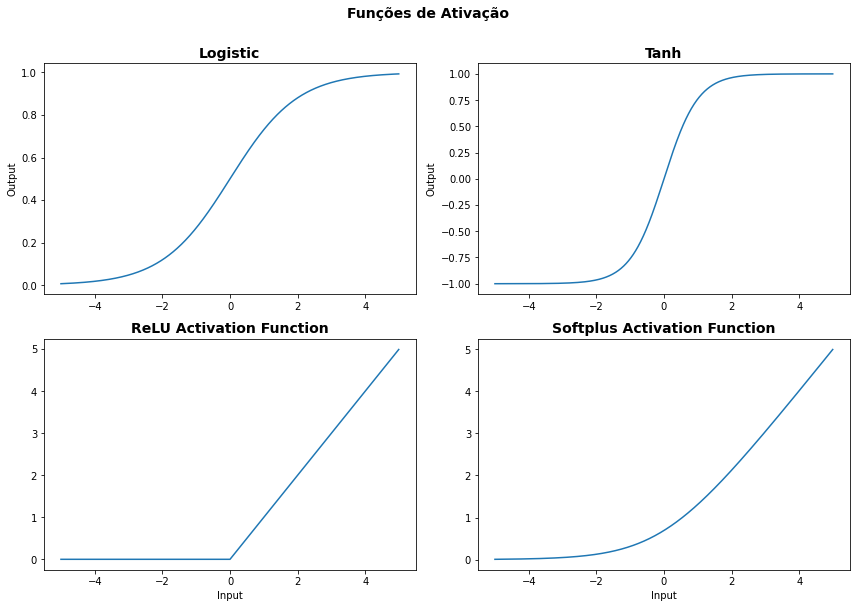

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.suptitle('Funções de Ativação', fontsize=14, weight='bold', y=1.05)

x = np.arange(-5, 5, 0.01)
y = 1 / (1 + np.exp(-x))
plt.subplot(2,2,1)
plt.plot(x,y)
plt.title('Logistic', fontsize=14, weight='bold')
# plt.xlabel('Input')
plt.ylabel('Output')

y = np.tanh(x)
plt.subplot(2,2,2)
plt.plot(x,y)
plt.title('Tanh ', fontsize=14, weight='bold')
# plt.xlabel('Input')
plt.ylabel('Output')

z = np.zeros(len(x))
y = np.maximum(z,x)
plt.subplot(2,2,3)
plt.plot(x,y)
plt.title('ReLU ', fontsize=14, weight='bold')
plt.xlabel('Input')
# plt.ylabel('Output');

y = np.log(1+np.exp(x))
plt.subplot(2,2,4)
plt.plot(x,y)
plt.title('Softplus ', fontsize=14, weight='bold')
plt.xlabel('Input')
# plt.ylabel('Output');

plt.tight_layout()
plt.show()



### Função Logística

As funções de ativação **logística** ou **sigmóide** (ou ainda Soft Step) são frequentemente usadas para problemas de classificação, devido ao comportamento assintótico próximo às extremidades positivas e negativas da função, com uma transição gradual entre elas. De fato, a regressão logística empregada para classificação binária, pode ser entendida como um modelo simples de neurônio. Ela fornece uma saída [0,1] que fornece a chance (odds) de uma classe ou outra, algo muito próximo a probabilidade da classe, mas que a rigor não é uma probabilidade.   

### Tangente Hiperbólica

Muito semelhante a função logística, a tanh apresenta melhor resultado quando as classes são mais claramente separáveis e, assim como a função logística são bastante empregadas em modelos neurais. Para modelos Deep Learning elas são empregadas principalmente nas camadas de saída. 

## Função Retificadora `ReLu`

Ou **Rectified Linear Unit**  era empregada desde os anos 60 para a extração de features de imagens, mas se tornou bastante popular a partir de 2011 bastante eficaz para o aprendizado de redes profundas e é, em geral, a função preferencial para as camadas ocultas de deep learning. Devido sua linearidade os gradientes não desaparecem com tanta freqüência devido a problemas numéricos como no caso de outras funções. Mas para as camadas de saída, entretanto, as funções logística e tanh ainda são preferíveis por serem  de fato classificadoras e você não deve empregar funções ReLU na saída das redes.

## Função Softplus

Ela é semelhante a ReLU mas, diferentemente da ReLU que não é diferenciável no ponto 0, a Softplus é diferenciável em qualquer ponto e pode ser aplicada em problemas onde a ReLU apresenta problemas para a aplicação de certos otimizadores baseados na primeira derivada.

Existem muitas outras funções de ativação, mas essas são bastante empregadas e suficientes para nossos propósitos.



# Aprendizado do Perceptron **AND**, **OR**, **XOR**
 
Aqui empregamos o [Perceptron Learning Rule](https://en.wikipedia.org/wiki/Perceptron) para o aprendizado das funções `AND` e `OR`. O aprendizado falha para a função `XOR`, pois ela não é linearmente separável.

Perceptron Learning Rule:

$$ w_i(t+1) = w_i(t) + \eta (y_j - \tilde{y}_j(t) ) x_{j,i} \ $$

onde $\eta$ é a taxa de aprendizado, $i$ são índices das diferentes *features* (atributos) e *j* das diferentes instâncias de pares $(X,y)$. O procedimento é repedido por $n$ épocas (iterações) ao até o erro atingir um determinado threshold $\epsilon$.

$$\frac{1}{s} \sum_{j=1}^{s} |y_j - \tilde{y}_j(t)| \le \epsilon $$ 





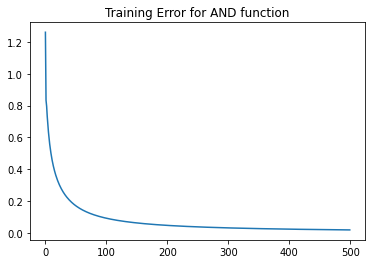

Error: 			 0.019
Epochs: 		 500
Predict: 		 [-0.99999593 -0.9797871  -0.97450337  0.96958219]
Predict Round: 		 [-1. -1. -1.  1.]
Pesos: 			 [ 4.26207824  4.37952708 -6.55530824]


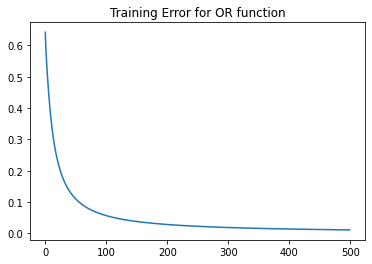

Error: 			 0.011
Epochs: 		 500
Predict: 		 [-0.97469298  0.98980791  0.99000407  0.99999934]
Predict Round: 		 [-1.  1.  1.  1.]
Pesos: 			 [ 4.81767261  4.82743898 -2.17956693]


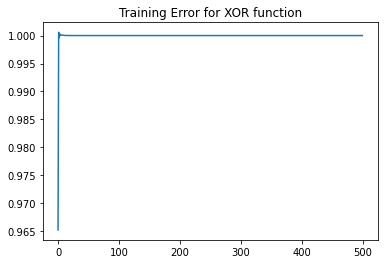

Error: 			 1.000
Epochs: 		 500
Predict: 		 [-0.24446297 -0.24446297  0.24446297  0.24446297]
Predict Round: 		 [-0. -0.  0.  0.]
Pesos: 			 [-1.11022302e-16  4.99030579e-01 -2.49515290e-01]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def train_perceptron(learn = 'AND', epochs = 500, learning_rate = 0.2, threshold = 1e-3):

  X = np.matrix([ [0,0], [1,0], [0,1], [1,1] ])
  learn_f = { 'AND':[-1, -1, -1, 1], 'OR':[-1, 1, 1, 1], 'XOR':[-1, 1, 1, -1] }
  y = np.array( learn_f[learn] )

  W = np.random.rand(3)

  y_pred = np.zeros([4])

  error_hist = []

  for epoch in range(epochs):
    for i in range(np.shape(X)[0]):
      y_pred[i] = np.tanh(W[0]*X[i,0] + W[1]*X[i,1] + W[2])

    error = 0
    for i in range(np.shape(y)[0]):
      error = error + np.abs(y[i] - y_pred[i])
    error = error / np.shape(y)[0]  #  erro médio

    error_hist.append(error)
    if error <= threshold: break 

    for i in range(np.shape(X)[0]):
      W[0] = W[0] + learning_rate * (y[i] - y_pred[i]) * X[i,0]
      W[1] = W[1] + learning_rate * (y[i] - y_pred[i]) * X[i,0]
      W[2] = W[2] + learning_rate * (y[i] - y_pred[i]) 

  return W, error_hist, y_pred


for funcao in ['AND','OR','XOR']:
  
  W, error_hist, y_pred = train_perceptron(funcao)
  # W, error_hist, y_pred = train_perceptron(funcao, 20000)

  sns.lineplot(x=range(len(error_hist)),y=error_hist)
  plt.title('Training Error for ' + funcao + ' function' )
  plt.show()

  print(f'Error: \t\t\t {error_hist[len(error_hist)-1] :0.3f}')
  print(f'Epochs: \t\t {len(error_hist)}')
  print(f'Predict: \t\t {y_pred}')
  print(f'Predict Round: \t\t {np.round(y_pred)}')
  print(f'Pesos: \t\t\t {W}')



Os gráficos acima mostram a redução do erro da predição das saídas ao longo do treinamento. O erro decresce à medida que os pesos são ajustados e, como você pode ver, convergem para o aprendizado das funções AND e OR, mas não para a função XOR.

# `scikit-learn` Perceptron

Acima desenvolvemos o aprendizado do Perceptron *by scratch* (do zero). Mas talvez interesse a você empregar a classe Perceptron do pacote `scikit-Learn`. O resultado será o mesmo do modelo acima.

A classe `Perceptron` encontra-se no `scikit-learn` dentro dos Classificadores lineares (SVM, regressão logística, etc.) que são treinados por métodos de gradiente descendente que você verá a seguir.

O uso da classe `Perceptron` segue de perto o esquema de muitos outros classificadores (como SVM, regressão logística e árvores de decisão). 
Podemos sumarizar esses passos em:

1. Define Model `m`
3. Train Model `m.fit(X,y)`
4. Predict Model `m.predict(X_test)`
5. Check results `m.score(X,y)`

Onde `X` e `y` são as variáveis do conjunto de treinamento e `X_test` as entradas que desejamos fazer a predição. Confortável com esse modelo? Esse esquema será bastante empregado na construção dos nossos modelos.




In [ ]:
from sklearn.linear_model import Perceptron

X = [[0., 0.], [0., 1.], [1., 0.], [1., 1.]]

for f, y in { 'AND':[0, 0, 0, 1], 'OR':[0, 1, 1, 1], 'XOR':[0, 1, 1, 0] }.items():
  
  print('\n Função: ', f); print(80*'-')

  ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1234)
  print(ppn)
  ppn.fit(X, y)    
 
  y_pred = ppn.predict([[0, 0], [0, 1], [1, 0], [1, 1]])
  print(y_pred)
 
  print(ppn.score(X,y))




 Função:  AND
--------------------------------------------------------------------------------
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1234, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)
[0 0 0 1]
1.0

 Função:  OR
--------------------------------------------------------------------------------
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1234, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)
[0 1 1 1]
1.0

 Função:  XOR
--------------------------------------------------------------------------------
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_

Veja que o `score()` do modelo para a função `XOR` é, diferente das demais, de apenas 0.5, pois, não sendo a função linearmente separável, apenas metade das instâncias de treinamento puderam ser aprendidas pelo modelo linear. 

# Experimentando Redes Neurais *sem programação*

Acesse agora o site https://playground.tensorflow.org/.

Você poderá fazer uma série de ‘experimentos’ e observar o aprendizado de uma rede neural para diferentes problemas. Aqui algumas sugestões de exploração para você:

1.	Comece configurando uma rede de 1 único neurônio e solucionando um problema linearmente separável. Observe o ajuste dos pesos e a redução do erro (Test e Training Loss).
2.	Tente com o mesmo neurônio, solucionar um problema não linearmente separável. Veja que o erro não decresce e os dados não conseguem ser separados corretamente.
3.	Adicione agora uma ou duas camadas. Veja que agora um problema simples, mesmo não linear, pode ser rapidamente aprendido.
4.	Experimente outros problemas mais difíceis (menos lineares). Você verá que para problemas mais complexos como o da figura abaixo pode ser necessário um grande número de elementos e camadas.


In [ ]:
from IPython.display import IFrame
IFrame('https://playground.tensorflow.org/', width='100%', height=600, style="-webkit-transform:scale(0.1);-moz-transform-scale(0.1);")

Aqui, alguns dos conjuntos de dados para classificação que você encontra no *playground*.

<figure>
<br>
<img src="http://meusite.mackenzie.br/rogerio/Deep_Learning/playground.png" width=700, align="center">
<br>
<br>
<figcaption><b>conjuntos de dados para classificação que você encontra no https://playground.tensorflow.org/ .</b></figcaption>
</figure>

# Multilayer Perceptron, redes multicamada

Como você viu os perceptrons podem ser conectados, a saída de um sendo a entrada de outros elementos, de modo a formar da rede neural em camadas.

As camadas externas são as camadas de entrada e saída da rede. As camadas internas são as camadas de ocultas (hidden) da rede. As redes podem ter diferentes configurações com diferentes números de entradas, saídas e número de camadas. 

>>> *As redes podem ter diferentes configurações com diferentes números de entradas, saídas e número de camadas.* 

Essas redes são conhecidas também como feed-forward ou, mais modernamente, como modelos sequenciais. As entradas são processadas em sequência, uma camada após a outra. 

O problema é que o modelo de aprendizado do perceptron não pode mais ser aplicado diretamente a uma rede multicamada. 


<figure>
<br>
<img src="http://meusite.mackenzie.br/rogerio/Deep_Learning/DL_01_multilayer.png" width=400, align="center">
<br>
<br>
<figcaption><b>Rede de Neurônicos Multicamada.</b></figcaption>
</figure>




## Backpropagation

Embora a ideia seja a mesma, o ajuste dos pesos para treinamento de uma rede multicamada difere bastante do ajuste dos pesos de um único perceptron e você deve notar que o ajuste terá magnitudes diferentes em cada camada. 

Aqui será útil empregarmos uma simplificação. Vamos supor uma rede de duas camadas definida pelas funções: 

$$ x \rightarrow  w_1 x = z \rightarrow  w_2  z^2  = y $$

Essas não são a função do perceptron, mas servem para ilustrar o procedimento. 

A primeira camada calcula  $w_1 x = z$ , e esse valor é a entrada para um novo cálculo e fornece a saída final  $w_2 z^2  = y$. É claro que ao final $y = w_2 ( w_1 x )^2$,  ou ainda $y = w_2 w_1^2 x^2$ , mas o processamento da rede é em camadas e a operação em cada uma delas, feita separadamente. Isso é importante para o ajuste dos pesos. Essas camadas e o ajustes *retropagados* encontram-se representados abaixo.


<figure>
<br>
<img src="http://meusite.mackenzie.br/rogerio/Deep_Learning/DL_01_backpropagation.png" width=500, align="center">
<br>
<br>
<figcaption><b>Esquema do aprendizado da rede: retropropagação do erro.</b></figcaption>
</figure>


Note que o ajuste do peso em cada camada depende da derivativa do erro da camada seguinte. Assim, em uma rede multicamadas, o cálculo da saída é feito calculando-se, a partir da camada de entrada para a de saída, cada uma das camadas (feed-foward). Já o ajuste dos pesos é feito na direção contrária, a partir da derivada do erro obtido na camada de saída retropropagando o erro (alusão ao fato do erro ter se propagado no cálculo feed-forward). Esse procedimento é conhecido como backpropagation, ou algoritmo de retropropagação.

O esquema a seguir sumariza nossa abordagem das redes feedforward. 

<figure>
<br>
<img src="http://meusite.mackenzie.br/rogerio/Deep_Learning/DL_01_backpropagation_full2.png" width=500, align="center">
<br>
<br>
<figcaption><b>Esquema geral do algoritmo de retropropagação 
que minimiza o erro quadrático.
</b></figcaption>
</figure>


A implementação do algoritmo de backpropagation não é exatamente complexa, mas exige um certo esforço e a matemática por traz do algoritmo requer um certo domínio de notação para lidar com diferentes camadas. Mas o seu princípio é bastante simples e poderoso e podemos entender melhor isso explorando, sem muita perda, modelos mais simples de descida do gradiente em uma única camada.

# Descida do Gradiente

A ideia por trás da descida do gradiente (ou BGV, Batch Gradient Descent) é ajustar gradualmente os pesos para minimizarmos uma função de custo. Por custo entendemos uma função que fornece alguma métrica de quão longe nosso modelo previu o resultado. Podemos, por exemplo adotar o erro quadrático médio (MSE). 

$$ MSE = \frac{1}{n} \sum_{i = 1}^{n} (y_i - \hat{y_i})^2 $$

Agora vamos descobrir como ajustar os parâmetros para reduzir o MSE. Por simplicidade vamos adotar a função de linear para $\hat{y_i} = w_1 x_i + w_0$ para aproximar (aprender) $y$.  

# Derivadas Parciais

Para isso podemos empregar as derivadas parciais para descobrir como cada parâmetro individual afeta o MSE e, assim, tomaremos a derivada em relação a $w_0$ e $w_1$ separadamente . 

$$ f(w_0,w_1) = \frac{1}{n} \sum_{i = 1}^{n} (y_i - (w_1 x_i + w_0)) ^ 2 $$

Para calcular a derivada parcial com respeito a $w_i$ é útil empregarmos a regra da cadeia.

$$ \frac{d f(g (x))}{dx} = f'(g (x)) g (x) ' $$

E podemos obter, a derivada parcial com respeito a $w_0$:

$$ \frac{\partial f(w_0,w_1)}{\partial w_0} = \frac{1}{n} \sum_{i = 1}^{n} -2 (y_i - (w_1 x_i + w_0)) $$

e a derivada parcial com respeito a $w_0$:

$$ \frac{\partial f(w_0,w_1)}{\partial w_1} = \frac{1}{n} \sum_{i = 1}^{n} -2x_i (y_i - (w_1 x_i + w_0)) $$


Note a diferença, havendo o produto por $x_i$ somente na primeira derivada. E ainda podemos escrever:

$$ \frac{\partial f(w_0,w_1)}{\partial w_0} = \frac{1}{n} \sum_{i = 1}^{n} -2 (y_i - \hat{y_i}) $$

$$ \frac{\partial f(w_0,w_1)}{\partial w_1} = \frac{1}{n} \sum_{i = 1}^{n} -2x_i (y_i - \hat{y_i}) $$



Podemos então, fazer ao ajuste dos pesos com uma taxa de aprendizado $\eta$ como:

$$ w_0 = w_0 + \eta \frac{\partial f(w_0,w_1)}{\partial w_0} $$
$$ w_1 = w_1 + \eta \frac{\partial f(w_0,w_1)}{\partial w_1} $$

Note que se $i=1$,

$$ w_0 = w_0 - \eta . 2 \hat{y_i} = w_0 - \lambda (y_i - \hat{y_i})$$
$$ w_1 = w_1 - \eta . 2 x_i \hat{y_i} = = w_1 - \lambda x_i (y_i - \hat{y_i})$$

Que nada mais é que o aprendizado do perceptron!

A descida do gradiente é um processo iterativo que a cada iteração (epoch) minimizamos ligeiramente o MSE atualizanado os pesos com base nessas derivadas. Em resumo, podemos dizer que a **descida do gradiente é em geral um processo que emprega as derivadas de uma função custo (o erro) para repetidamente ajustar os pesos e minimizar o erro**.

>>> *descida do gradiente é em geral um processo que emprega as derivadas de uma função custo (o erro) para repetidamente ajustar os pesos e minimizar o erro*

O exemplo abaixo implementa a descida do gradiente para uma função linear.



In [ ]:
def gradient_descent(X, y, lr=0.01, epoch=10, w0=0.2, w1=0.2):

    log, mse, weigths = [], [], []
    N = len(X) 
    
    for _ in range(epoch):
        weigths.append([w1,w0])
                
        f = y - (w1*X + w0)
    
        w1 =  w1 - lr * (-2 * X.dot(f).sum() / N)
        w0 =  w0 - lr * (-2 * f.sum() / N)
        
        log.append([w0, w1])
        mse.append(( (y - (w1*X + w0))**2 ).mean())        
    
    return w1, w0, log, mse, weigths

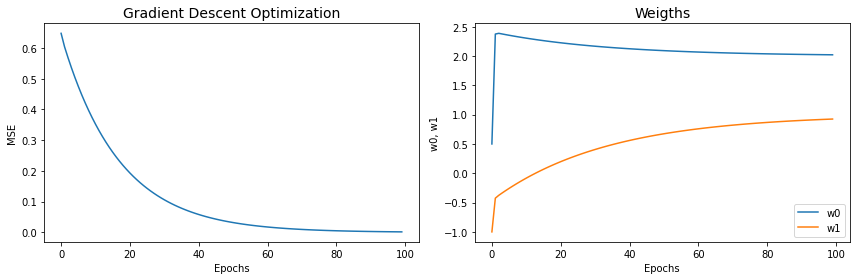

   x  y    y_pred     error
0  0  1  0.927195  0.005301
1  1  3  2.947712  0.002734
2  2  5  4.968230  0.001009
3  3  7  6.988747  0.000127
4  4  9  9.009264  0.000086
MSE = 0.00
w0 = 0.93 , w1 = 2.02


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

learning = pd.DataFrame({'x' : np.zeros(6),
                         'y' : np.zeros(6),
                         'y_pred' : np.zeros(6),
                         'error' : np.zeros(6)})

def y(x):
  return 2*x + 1

learning.x = np.arange(0,6,1)
learning.y = y(learning.x)

w1, w0, log, mse, weigths = gradient_descent(learning.x, learning.y, lr=0.05, epoch=100, w0=-1, w1=0.5)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(range(len(mse)), mse)
plt.title('Gradient Descent Optimization', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')

plt.subplot(1,2,2)
plt.plot(range(len(np.array(weigths)[:,0])), np.array(weigths)[:,0], label='w0')
plt.plot(range(len(np.array(weigths)[:,1])), np.array(weigths)[:,1], label='w1')
plt.title('Weigths', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('w0, w1')
plt.legend()

plt.tight_layout()
plt.show()

learning.y_pred = w1*learning.x + w0
learning.error = (learning.y - learning.y_pred)**2 

print(learning.head())
print(f'MSE = {learning.error.mean() :.2f}')
print(f'w0 = {w0 :.2f} , w1 = {w1 :.2f}')


Veja o resultado bastante próximo dos coeficientes originais da função.

# Gradiente Estocástico

O Gradiente Estocástico (SGD, Stochastic Gradient Descent) funciona quase do mesmo modo que a descida do gradiente. Você deve ter notado que para o cálculo do gradiente empregamos todo o conjunto dados. Isso é altamente custoso e torna a descida do gradiente extremamente lenta para grandes quantidades de dados. O Gradiente Estocástico, então, no lugar de empregar todos os dados seleciona apenas uma amostra dos dados para fazer o ajuste dos pesos. Isso torna o torna o processamento muito mais rápido e podemos definir o tamanho da amostra a ser empregada (batch_size). 

In [ ]:
import random

def SGD(X, y, lr=0.01, epoch=10, w0=0.2, w1=0.2, batch_size=1):

    log, mse, weigths = [], [], []
    N = len(X) 
    
    for _ in range(epoch):
        weigths.append([w1,w0])

        idx = random.sample(range(len(X)), batch_size) 
        Xs = X[idx]
        ys = y[idx]
                
        f = ys - (w1*Xs + w0)
    
        # Updating m and b
        w1 =  w1 - lr * (-2 * Xs.dot(f).sum() / N)
        w0 =  w0 - lr * (-2 * f.sum() / N)
        
        log.append([w0, w1])
        mse.append(( (ys - (w1*Xs + w0))**2 ).mean())        
    
    return w1, w0, log, mse, weigths

Como nosso conjunto anterior é muito pequeno para trabalhar com amostras, vamos criar um conjunto maior de 100 elementos adicionando ainda ruído à saída da função linear, e então aplicarmos o SGD.

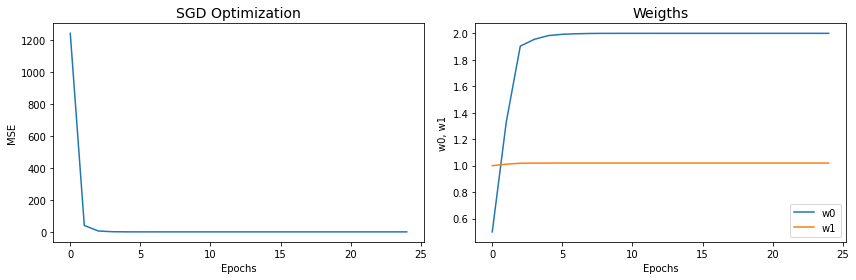

          x          y     y_pred     error
0  1.559952   4.119903   4.139313  0.000377
1  2.559952   6.119903   6.139023  0.000366
2  3.559952   8.119903   8.138732  0.000355
3  4.559952  10.119903  10.138442  0.000344
4  5.559952  12.119903  12.138151  0.000333
MSE = 0.00
w0 = 1.02 , w1 = 2.00


In [ ]:
def y(x):
  return 2*x + 1

x = np.arange(0,100,1) + 2*np.random.random(1)
y = y(x)

learning = pd.DataFrame({'x' : x,
                         'y' : y,
                         'y_pred' : np.zeros(len(x)),
                         'error' : np.zeros(len(x))})

random.seed(1234) # Para reprodutibilidade dos resultados
w1, w0, log, mse, weigths = SGD(learning.x, learning.y, lr=0.002, epoch=25, w0=1, w1=0.5, batch_size=5)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(range(len(mse)), mse)
plt.title('SGD Optimization', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')

plt.subplot(1,2,2)
plt.plot(range(len(np.array(weigths)[:,0])), np.array(weigths)[:,0], label='w0')
plt.plot(range(len(np.array(weigths)[:,1])), np.array(weigths)[:,1], label='w1')
plt.title('Weigths', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('w0, w1')
plt.legend()

plt.tight_layout()
plt.show()

learning.y_pred = w1*learning.x + w0
learning.error = (learning.y - learning.y_pred)**2 

print(learning.head())
print(f'MSE = {learning.error.mean() :.2f}')
print(f'w0 = {w0 :.2f} , w1 = {w1 :.2f}')


## Outros métodos

Existem muitas outras técnicas de optimização que podem ser empregadas, como:

* Momentum
* Adagrad
* RMSProp
* Adam

Que são métodos baseados na derivada de primeira ordem, e outros baseados em derivadas de segunda ordem e métodos para funções não diferenciáveis. Mas os métodos Adam, e as variantes do gradiente (estocástico, batch e mini-batch) são hoje os métodos mais comumente empregados para o aprendizado de redes neurais. Você pode achar útil consultar uma visão geral dessas técnicas.

## Outras funções

Acima aplicamos o método do gradiente para uma função bastante simples, linear. Quando consideramos uma rede de várias camadas a função é bastante mais complexa, e precisamos obter a derivada com relação ao peso em cada camada. Mas o princípio é o mesmo embora, seja fundamental termos um método eficiente para o cálculo dessas derivadas em particular em se tratando de redes neurais profundas.

## Convergência

Nossa função era bastante e simples como também a nossa função custo. Entretanto, problemas mais complexos, podem não ter a convergência do ajuste dos pesos garantida. Isto é, o resultado pode não convergir para um erro mínimo, ou mesmo pode *parar* em um mínimo local. Esse é um dos grandes problemas do aprendizado de redes neurais.



# Síntese

Nesta trilha você pôde conhecer os principais conceitos dos modelos neurais. Ainda entramos nos modelos de redes profundas mas, tendo acompanhado a aqui a **evolução dos modelos neurais**, você deve ter entendido que temos um  caminho a percorrer desde de o modelo simples de um único **perceptron** até chegarmos às redes profundas. E é interessante você notar como a história desses conceitos evoluem, com momentos de grande entusiasmo e outros de inibição, além de sucessivas superações das dificuldades que vão surgindo. Hoje mesmo, diante do entusiasmo generalizado de uso das redes profundas e diversos campos, muitos pesquisadores se perguntam se já não estamos próximos de um novo eclipse.

Além de acompanhar essa evolução, aprendemos aqui a estrutura do neurônio artifical, o **perceptron**. Ele é uma unidade simples e está bem longe do que é um neurônio biológico que opera com valores contínuos, diferenças de potencial, representação de informações no tempo etc. Podemos até mesmo dizer que o neurônio biológico serve mais como *inspiração* para os modelos neurais do que exatamente como um *modelo*. Embora simples, esse mesmo perceptron ainda é o modelo de neurônio artificial empregado nos principais *frameworks* de *Deep Learning*  

Você também entendeu como podemos treinar um perceptron responder a problemas simples (**linearmente separáveis**) e que podemos combinar diversos desses elementos em camadas formando uma rede neural multicamada, **feed-forward** ou **MLP Multilayer Perceptron**. Entretanto, o aprendizado aqui exige técnicas mais elaboradas e você conheceu a técnica da **retropagação do erro**, ou **backpropagation**. E para compreendermos melhor esse mecanismo de aprendizado estudamos algoritmos de **descida do gradiente**, de modo simplificado aqui e em uma única camada, mas que permite entendermos o princípio dos **otimizadores** que desempenham um papel fundamental no aprendizado de quaisquer modelos neurais.





## Para saber mais

Acesse **The Neural Network Zoo** em https://www.asimovinstitute.org/neural-network-zoo/ e explore as diferentes diferentes arquiteturas de rede apresentadas.

Acesse **Deep Learning 101 - Part 1: History and Background** em 
https://www.programmersought.com/article/54453361399/ e conheça um pouco de como evoluíram os modelos neurais.

Acesse **Understanding the Mathematics behind Gradient Descent** em https://towardsdatascience.com/understanding-the-mathematics-behind-gradient-descent-dde5dc9be06e  e entenda um pouco mais da matemática por trás da técnica de gradientes. 

Além é claro de acessar https://playground.tensorflow.org/ e experimentar os modelos neurais.

## Referências

1. Ian Goodfellow and Yoshua Bengio and Aaron Courville, **Deep Learning**. MIT Press (2016). Also available online: http://www.deeplearningbook.org. 

1. ___. **Deep Learning 101 - Part 1: History and Background** Disponível em:
https://www.programmersought.com/article/54453361399/ Acesso em: 21 de abril de 2021.

2. ___. **A Concise History of Neural Networks**. Disponível em:
https://towardsdatascience.com/a-concise-history-of-neural-networks-2070655d3fec#.alhfvwwl2 Acesso em: 21 de abril de 2021.

3. ___. **Deep Learning Book**. Disponível em:https://www.deeplearningbook.com.br/ Acesso em: 21 de abril de 2021.

4. ___. **UFLDL Deep Learning Tutorial**. Disponível em: http://ufldl.stanford.edu/tutorial/ Acesso em: 21 de abril de 2021.

5. Nielsen, M. **Neural Networks and Deep Learning**. Disponível em: http://neuralnetworksanddeeplearning.com/ Acesso em: 21 de abril de 2021.

6. Fridman, L. **MIT Deep Learning Basics: Introduction and Overview with TensorFlow**. Disponível em: https://blog.tensorflow.org/2019/02/mit-deep-learning-basics-introduction-tensorflow.html Acesso em: 21 de abril de 2021.

7. Kelleher, J. D. **Deep Learning** (2018) The MIT Press.

7. Skansi, S. **Introduction Deep Learning** (2018) Springer.